In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import datasets,models,layers
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [25]:
data = tf.keras.datasets.cifar10

In [26]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()


170500096/170498071 [==============================] - 129s 1us/step


In [27]:
train_images.shape

(50000, 32, 32, 3)

In [28]:
test_images.shape

(10000, 32, 32, 3)

In [29]:
print(train_labels[0])

[6]


In [30]:
print(train_images[1])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


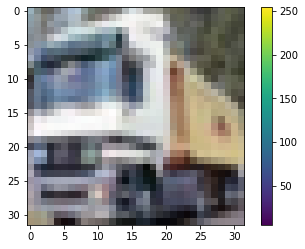

In [31]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

plt.show()

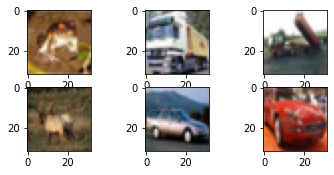

In [32]:
for i in range(6):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_images[i])
plt.show()

In [33]:
#Normalize

train_images, test_images = train_images / 255.0, test_images / 255.0

In [34]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [50]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 50s 31ms/step - loss: 1.7504 - accuracy: 0.3538 - val_loss: 1.2377 - val_accuracy: 0.5571
Epoch 2/20
1563/1563 [==============================] - 49s 32ms/step - loss: 1.2006 - accuracy: 0.5728 - val_loss: 1.1088 - val_accuracy: 0.6035
Epoch 3/20
1563/1563 [==============================] - 52s 34ms/step - loss: 1.0277 - accuracy: 0.6391 - val_loss: 0.9738 - val_accuracy: 0.6569
Epoch 4/20
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9070 - accuracy: 0.6813 - val_loss: 0.9687 - val_accuracy: 0.6615
Epoch 5/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8321 - accuracy: 0.7090 - val_loss: 0.8796 - val_accuracy: 0.6937
Epoch 6/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7541 - accuracy: 0.7356 - val_loss: 0.8915 - val_accuracy: 0.6942
Epoch 7/20
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6976 - accuracy: 0.7552 - val_loss: 0.8820 -

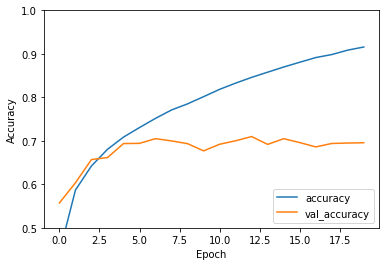

In [37]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [39]:
losses = pd.DataFrame(model.history.history)

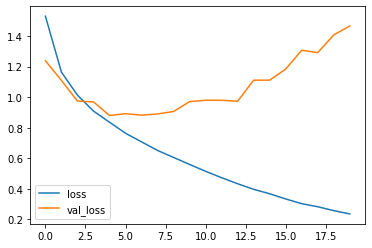

In [40]:
losses[['loss','val_loss']].plot()

In [42]:
print(model.metrics_names)
print(model.evaluate(train_images,train_labels,verbose=0))

['loss', 'accuracy']
[0.18150517344474792, 0.9371600151062012]


In [43]:
predictions = model.predict_classes(train_images)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(train_labels,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5000
           1       0.97      0.98      0.98      5000
           2       0.89      0.95      0.92      5000
           3       0.89      0.88      0.88      5000
           4       0.93      0.90      0.92      5000
           5       0.95      0.85      0.90      5000
           6       0.92      0.98      0.95      5000
           7       0.97      0.95      0.96      5000
           8       0.97      0.97      0.97      5000
           9       0.98      0.95      0.97      5000

    accuracy                           0.94     50000
   macro avg       0.94      0.94      0.94     50000
weighted avg       0.94      0.94      0.94     50000



In [53]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [83]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [82]:
my_number = train_images[1]